In [1]:
import pandas as pd
import plotly.express as px

df = pd.read_excel('/content/CSD - Resource Room.xlsx')
#캠퍼스, 워크숍, NNN 드랍 후 공백 N으로 채움, capacity N인 경우 20으로 채움
Resource_Room = pd.DataFrame(df)
Resource_Room = Resource_Room.drop(labels='Campus', axis=1)
Resource_Room = Resource_Room.drop(labels='Workshop', axis=1)
Resource_Room = Resource_Room[~Resource_Room.apply(lambda row: row.astype(str).str.contains('IMus', case=False, na=False).any(), axis=1)]
Resource_Room = Resource_Room[~(Resource_Room[['Lecture', 'Tutorial', 'Lab']].eq('N').all(axis=1))]
Resource_Room = Resource_Room.fillna('N')
Resource_Room['Capacity'] = Resource_Room['Capacity'].replace('N', '20')
Resource_Room = Resource_Room.drop(Resource_Room[Resource_Room['Capacity'] == 0].index)

#조건에 따라 Gerneral한 경우로 분류
conditions = [
    ['Y', 'Y', 'Y']
]
columns_to_check = ['Lecture', 'Tutorial', 'Lab']
General = Resource_Room[Resource_Room[columns_to_check].apply(tuple, axis=1).isin(map(tuple, conditions))]

#Gerneral하지 않은 경우를 뺀 나머지 데이터프레임 생성
conditions_to_exclude = [
    ['Y', 'Y', 'N'],
    ['N', 'Y', 'Y']
]
columns_to_check = ['Lecture', 'Tutorial', 'Lab']
etc_Room = Resource_Room[~Resource_Room[columns_to_check].apply(tuple, axis=1).isin(map(tuple, conditions))]

#G_Resource_Room_IMus = G_Resource_Room[G_Resource_Room['Description'].str.contains('IMus', na=False) | G_Resource_Room['Resource Code'].str.contains('IMus', na=False)]
Kitchen = etc_Room[etc_Room.apply(lambda row: row.astype(str).str.contains('Kitchen', regex=False).any(), axis=1)]
Design = etc_Room[etc_Room['Description'].str.contains('DESIGN', case=False, na=False)]
df_combined = pd.concat([Kitchen, Design])
LL = etc_Room[~etc_Room.apply(tuple, axis=1).isin(df_combined.apply(tuple, axis=1))]

#조건에 따라 Gerneral한 경우로 분류
conditions = [
    ['N', 'N', 'Y']
]
columns_to_check = ['Lecture', 'Tutorial', 'Lab']
Lab = LL[LL[columns_to_check].apply(tuple, axis=1).isin(map(tuple, conditions)) & ~LL.apply(tuple, axis=1).isin(df_combined.apply(tuple, axis=1))]

#조건에 따라 Gerneral한 경우로 분류
conditions = [
    ['Y', 'N', 'N']
]
columns_to_check = ['Lecture', 'Tutorial', 'Lab']
Lecture = LL[LL[columns_to_check].apply(tuple, axis=1).isin(map(tuple, conditions)) & ~LL.apply(tuple, axis=1).isin(df_combined.apply(tuple, axis=1))]

df_combined = pd.concat([Lab, Lecture])
ETC = LL[~LL.apply(tuple, 1).isin(df_combined.apply(tuple, 1))]

General['Type'] = 'General'
Lab['Type'] = 'Lab'
Kitchen['Type'] = 'Kitchen'
Design['Type'] = 'Art'
Lecture['Type'] = 'Lecture'
ETC['Type'] = 'Etc'

df_final = pd.concat([General, ETC, Kitchen, Design, Lab, Lecture], ignore_index=True)
df_final = df_final.drop_duplicates(keep='first')
df_final.loc[df_final.astype(str).apply(lambda row: row.str.contains('PBL', case=False, na=False).any(), axis=1), 'Type'] = 'PBL'
df_final

<ipython-input-1-f1901aff202e>:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  General['Type'] = 'General'
<ipython-input-1-f1901aff202e>:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Lab['Type'] = 'Lab'
<ipython-input-1-f1901aff202e>:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-

,Resource Code,Description,Capacity,Lecture,Tutorial,Lab,Resource Status,Type
0,MPH - GBS,MPH - [MULTIPURPOSE HALL],100.0,Y,Y,Y,Active,General
1,C404,C404 - [C404],20.0,Y,Y,Y,Active,General
2,C3M04b,C3M04 - [C3M04b-SABE Computer Lab],30.0,Y,Y,Y,Active,General
3,C3M05,C3M05 - [C3M05-Computer Lab],30.0,Y,Y,Y,Active,General
4,C314,C314 - [Microteaching Lab],30.0,Y,Y,Y,Active,General
...,...,...,...,...,...,...,...,...
180,CHEM1,Chemistry 1 Lab,48.0,N,N,Y,Active,Lab
181,CHEM2,Chemistry 2 Lab,48.0,N,N,Y,Active,Lab
182,PHYTO,Phytochemistry Lab,20.0,N,N,Y,Active,Lab
183,Civil Workshop,"Civil Workshop, Level 4 Block E",30.0,N,N,Y,Active,Lab


In [2]:
import pandas as pd
import re
import numpy as np

# 엑셀 파일의 절대 경로 또는 주피터 노트북 기준 상대 경로를 지정합니다.
offer = pd.read_excel('/content/CSD - Course Offer.xlsx')
offer = pd.DataFrame(offer)

offer.drop(columns=['Unnamed: 0'], inplace=True)
offer.drop(offer.index[1157], axis=0, inplace=True)
offer['Capacity'] = offer['Capacity'].astype(int)
offer['Min Per Session'] = offer['Min Per Session'].astype(int)

total_time = 134790

offer['Session'] = offer['Session'].str.upper()
offer['Lecturer'] = offer['Lecturer'].str.upper()
offer['CourseCode'] = offer['CourseCode'].str.upper()
offer['FacultyCode'] = offer['FacultyCode'].str.upper()

offer['Session'] = offer['Session'].str.replace(r'\(S\)', '', regex=True)

# "COMBINED TO /"를 복사하여 error 테이블에 저장. 이후 원본 데이터에서 삭제.
mask = offer['Session'].str.contains("COMBINED TO /", na=False)

# error 데이터프레임에 해당 행들을 복사하여 저장합니다.
error = offer[mask].copy()

# 원본 offer 데이터프레임에서 해당 행들을 삭제합니다.
offer.drop(offer[mask].index, inplace=True)

#"GROUP A", "GROUP B", "GROUP C" 등 해당하는 행을 찾고, Session 값을 "LECTURE"로 변경
offer.loc[offer['Session'].str.contains(r'^GROUP\s+[A-Z]$', na=False), 'Session'] = 'LECTURE'

group_cols = ['CourseCode', 'FacultyCode', 'Session', 'Capacity', 'Min Per Session', 'Lecturer']

# 그룹별로 중복된 행을 처리합니다.
for _, group in offer.groupby(group_cols):
    if len(group) > 1:  # 중복 그룹인 경우
        # 원래 Session 값을 앞뒤 공백 제거 후 사용합니다.
        orig_session = group.iloc[0]['Session'].strip()
        # Session 값이 숫자로 끝나는지 검사 (예: "TUTORIAL 1")
        m = re.search(r'^(.*?)(\d+)$', orig_session)
        if m:
            base = m.group(1).strip()  # 문자 부분 (예: "TUTORIAL")
            start_num = int(m.group(2))  # 기존에 붙은 숫자 (예: 1)
        else:
            base = orig_session
            start_num = 1

        # 그룹 내 각 행에 대해 순차적으로 번호를 붙여 Session 값을 변경합니다.
        for offset, idx in enumerate(group.index):
            new_session = f"{base} {start_num + offset}"
            offer.at[idx, 'Session'] = new_session

# (초기 전제: offer DataFrame과 error DataFrame이 존재함; error가 없으면 빈 DataFrame 생성)
if 'error' not in globals():
    error = pd.DataFrame()

### Step 1. offer에서 "COMBINED TO" 행 추출 → child_class로 저장, offer에서는 제거
child_class = offer[offer['Session'].str.contains('COMBINED TO', na=False)].copy()
offer.drop(child_class.index, inplace=True)

### Step 2. child_class의 Session 열에서 과목코드 추출
child_class['extracted_code'] = child_class['Session'].str.extract(r'COMBINED TO\s+([A-Z0-9]+)', expand=False)

### Step 3. child_class 내에서 오류 및 정상/후손 분리

# (A) "자기 자신 참조" 조건: 추출한 코드가 해당 행의 CourseCode와 같으면 → 오류
self_ref = child_class['extracted_code'] == child_class['CourseCode']

# (B) 정상(child) 조건: 자기 자신 참조가 아니고, 추출한 코드가 offer의 CourseCode에 존재하는 경우
valid_child_mask = (~self_ref) & (child_class['extracted_code'].isin(offer['CourseCode']))

# (C) 후손(grandchild) 후보: 자기 자신 참조가 아니고, 추출한 코드가 offer에는 없지만, child_class의 CourseCode에는 존재하는 경우
#     (즉, 부모(대상 CourseCode)가 offer에 없으므로 자식끼리 연결되어 있음을 의미)
valid_grand_mask = (~self_ref) & (~child_class['extracted_code'].isin(offer['CourseCode'])) & \
                    (child_class['extracted_code'].isin(child_class['CourseCode']))

# (D) 오류 조건:
#     - 자기 자신 참조인 경우
#     - 또는 추출한 코드가 offer에도 child_class에도 존재하지 않는 경우
error_mask = self_ref | ((~child_class['extracted_code'].isin(offer['CourseCode'])) &
                           (~child_class['extracted_code'].isin(child_class['CourseCode'])))

# child_class 오류 처리: 추출
child_error = child_class[error_mask].copy()

# 정상 child_class (valid_child) 추출
valid_child = child_class[valid_child_mask].copy()

# 후보 후손(grandchild) 추출
candidate_grand = child_class[valid_grand_mask].copy()

### Step 4. grand_child_class 내에서 추가 오류 처리
# 오류 조건 (grandchild): 자기 자신 참조 → 오류
grand_self_ref = candidate_grand['extracted_code'] == candidate_grand['CourseCode']
error_grand = candidate_grand[grand_self_ref].copy()

# 최종 grand_child_class: 후보에서 자기 자신 참조 오류 제거
grand_child_class = candidate_grand[~grand_self_ref].copy()

# 최종 error: 기존 child 오류와 후손에서 발생한 오류를 모두 누적
error_df = pd.concat([child_error, error_grand], ignore_index=True)
error = pd.concat([error, error_df], ignore_index=True)

### 최종 정상 데이터
# child_class는 valid_child로 업데이트 (offer의 부모가 존재하는 경우)
child_class = valid_child.copy()
# grand_child_class는 위에서 구한 대로

# error DataFrame이 없으면 빈 DataFrame 생성
if 'error' not in globals():
    error = pd.DataFrame()

##############################################
# 교차검증 1: child_class에서 자기 자신 참조하는 행 처리
##############################################
child_self_ref_mask = (child_class['extracted_code'] == child_class['CourseCode'])
child_self_ref_errors = child_class[child_self_ref_mask].copy()
error = pd.concat([error, child_self_ref_errors], ignore_index=True)
child_class = child_class[~child_self_ref_mask].copy()

##############################################
# 교차검증 2: child_class에서 추출한 과목코드가 offer의 CourseCode에 없음(부모 없음)
##############################################
child_missing_parent_mask = ~child_class['extracted_code'].isin(offer['CourseCode'])
child_missing_parent_errors = child_class[child_missing_parent_mask].copy()
error = pd.concat([error, child_missing_parent_errors], ignore_index=True)
child_class = child_class[~child_missing_parent_mask].copy()

##############################################
# 교차검증 3: offer에서 자기 자신 참조하는 행 처리
# (offer에 COMBINED TO가 남아있다면 해당 행에 대해 extracted_code를 추출)
##############################################
offer_combined_mask = offer['Session'].str.contains('COMBINED TO', na=False)
if offer_combined_mask.any():
    offer.loc[offer_combined_mask, 'extracted_code'] = offer.loc[offer_combined_mask, 'Session'].str.extract(r'COMBINED TO\s+([A-Z0-9]+)', expand=False)
    offer_self_ref_mask = (offer['extracted_code'] == offer['CourseCode'])
    offer_self_ref_errors = offer[offer_self_ref_mask].copy()
    error = pd.concat([error, offer_self_ref_errors], ignore_index=True)
    offer.drop(offer[offer_self_ref_mask].index, inplace=True)

##############################################
# 교차검증 4: grand_child_class에서 자기 자신 참조하는 행 처리
##############################################
grand_self_ref_mask = (grand_child_class['extracted_code'] == grand_child_class['CourseCode'])
grand_self_ref_errors = grand_child_class[grand_self_ref_mask].copy()
error = pd.concat([error, grand_self_ref_errors], ignore_index=True)
grand_child_class = grand_child_class[~grand_self_ref_mask].copy()

##############################################
# 교차검증 5: grand_child_class에서 추출한 과목코드가 offer의 CourseCode에 없음(부모 없음)
##############################################
grand_missing_parent_mask = ~grand_child_class['extracted_code'].isin(offer['CourseCode'])
grand_missing_parent_errors = grand_child_class[grand_missing_parent_mask].copy()
error = pd.concat([error, grand_missing_parent_errors], ignore_index=True)
grand_child_class = grand_child_class[~grand_missing_parent_mask].copy()

##############################################
# 교차검증 6: 부모(offer 또는 child_class)에서 드랍된 행과 연결된 자식(또는 손자) 행 처리
# 드랍된 행들의 CourseCode를 모아서, 이 코드를 extracted_code로 사용하는 행이 있다면 error로 처리
##############################################
# 지금까지 error에 추가된 행들의 CourseCode를 모읍니다.
dropped_codes = set(error['CourseCode'].unique())

# child_class에서 연결된 자식 행 검사
child_linked_mask = child_class['extracted_code'].isin(dropped_codes)
child_linked_errors = child_class[child_linked_mask].copy()
error = pd.concat([error, child_linked_errors], ignore_index=True)
child_class = child_class[~child_linked_mask].copy()

# grand_child_class에서 연결된 손자 행 검사
grand_linked_mask = grand_child_class['extracted_code'].isin(dropped_codes)
grand_linked_errors = grand_child_class[grand_linked_mask].copy()
error = pd.concat([error, grand_linked_errors], ignore_index=True)
grand_child_class = grand_child_class[~grand_linked_mask].copy()

# child_class의 각 행을 순회하며 조건에 맞는 offer 행의 Capacity에 child_class의 Capacity를 합산합니다.
for idx, child_row in child_class.iterrows():
    # 조건: offer의 CourseCode, Min Per Session, Lecturer가 child_row의 extracted_code, Min Per Session, Lecturer와 일치
    mask = (
        (offer['CourseCode'] == child_row['extracted_code']) &
        (offer['Min Per Session'] == child_row['Min Per Session']) &
        (offer['Lecturer'] == child_row['Lecturer'])
    )
    # 일치하는 행이 있다면, offer의 Capacity에 child_row의 Capacity를 더함
    if mask.any():
        offer.loc[mask, 'Capacity'] += child_row['Capacity']

# 기존 조건
conditions = [
    offer['Session'].str.contains('LECTURE & TUTORIAL', na=False, case=False),
    offer['Session'].str.contains('TUTORIAL', na=False, case=False),
    offer['Session'].str.contains('LECTURE', na=False, case=False),
    offer['Session'].str.contains('LAB', na=False, case=False),
    offer['Session'].str.contains('PBL 1', na=False, case=False),
    offer['Session'].str.contains('HAND DRAWING|CAD DRAWING 2|CAD DRAWING 1', na=False, case=False),
    offer['Session'].str.contains('KITCHEN', na=False, case=False),
    offer['Session'].str.contains('OPTOM CLINIC|SOO - EXAM CLINIC', na=False, case=False)
]

# 기존 선택지 + 새 선택지
choices = [
    'GENERAL',
    'TUTORIAL',
    'LECTURE',
    'LAB',
    'PBL',
    'ART',
    'KITCHEN',
    'LECTURE'
]

# 조건을 적용하여 'Category' 열 생성
offer['Category'] = np.select(conditions, choices, default=np.nan)

offer

,CourseCode,FacultyCode,Session,Capacity,Min Per Session,Lecturer,Category
6,AB443,SABE,LECTURE,25,180,NURUL ANIDA MOHAMAD,LECTURE
7,AB516,SABE,LECTURE FATHER CLASS,50,450,LIM KER CHWING,LECTURE
8,AB533,SABE,LECTURE FATHER CLASS,40,180,ASST. PROF. IDR BAIZURA HANIM BT BIDIN,LECTURE
10,AB618,SABE,LECTURE 2,20,240,NURUL ANIDA MOHAMAD,LECTURE
11,AB618,SABE,LECTURE 1,20,210,NURUL ANIDA MOHAMAD,LECTURE
...,...,...,...,...,...,...,...
1152,SP206,FOSSLA,LECTURE 1,20,180,NURUL HIDAYAH BT MOHD SA'AT,LECTURE
1153,SP206,FOSSLA,LECTURE 2,20,180,NURUL HIDAYAH BT MOHD SA'AT,LECTURE
1154,SP208,FOSSLA,LECTURE,5,120,ARMAN IMRAN ASHOK,LECTURE
1155,SP208,FOSSLA,LECTURE,5,180,ARMAN IMRAN ASHOK,LECTURE


           Group Category                                Lecturer  \
0    AB443_S1_D1  lecture                     NURUL ANIDA MOHAMAD   
1    AB516_S1_D1  lecture                          LIM KER CHWING   
2    AB516_S1_D2  lecture                          LIM KER CHWING   
3    AB516_S1_D3  lecture                          LIM KER CHWING   
4    AB533_S1_D1  lecture  ASST. PROF. IDR BAIZURA HANIM BT BIDIN   
..           ...      ...                                     ...   
764  SP206_S1_D1  lecture             NURUL HIDAYAH BT MOHD SA'AT   
765  SP206_S1_D1  lecture             NURUL HIDAYAH BT MOHD SA'AT   
766  SP208_S1_D1  lecture                       ARMAN IMRAN ASHOK   
767  SP208_S1_D1  lecture                       ARMAN IMRAN ASHOK   
768  SP208_S1_D1  lecture                       ARMAN IMRAN ASHOK   

    Assigned Room Room Type  Group Capacity  Room Capacity Assigned Day  \
0          G08-12  tutorial              25             25          Mon   
1            C403  tu

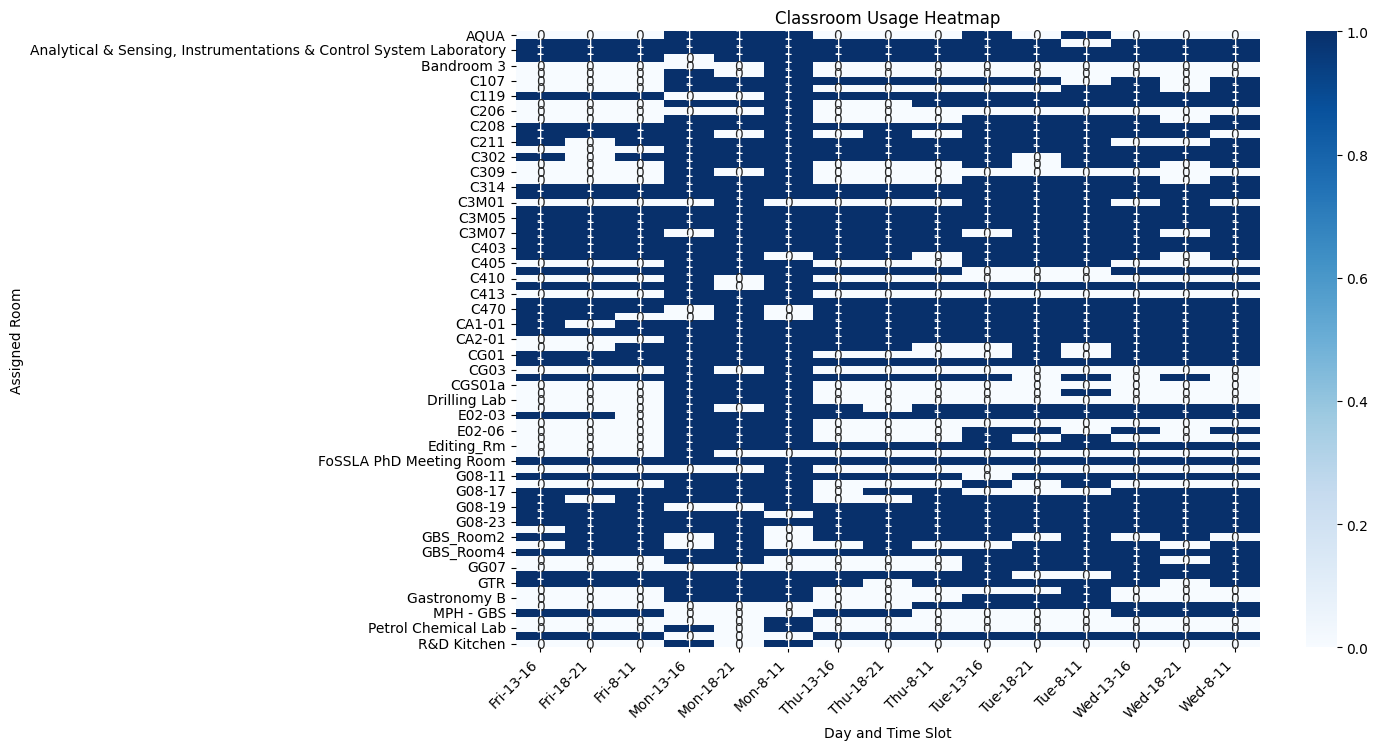

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.optimize import linear_sum_assignment

def expand_room_slots(df_final):
    time_slots = ['8-11', '13-16', '18-21']
    days = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri']

    expanded_rooms = []
    for _, row in df_final.iterrows():
        for day in days:
            for time in time_slots:
                expanded_rooms.append({
                    'Resource Code': row['Resource Code'],
                    'Type': row['Type'],
                    'Capacity': row['Capacity'],
                    'Assigned Day': day,
                    'Assigned Time Slot': time,
                    'Lecture': row.get('Lecture', 'N'),
                    'Tutorial': row.get('Tutorial', 'N'),
                    'Lab': row.get('Lab', 'N')
                })

    return pd.DataFrame(expanded_rooms)

def preprocess_offers(offer, max_room_capacity):
    expanded_offers = []
    for _, row in offer.iterrows():
        remaining_students = row['Capacity']
        total_duration = row['Min Per Session']
        session_count = 1

        while remaining_students > 0:
            assigned_capacity = min(max_room_capacity, remaining_students)
            remaining_students -= assigned_capacity

            remaining_duration = total_duration
            sub_session = 1

            while remaining_duration > 0:
                session_duration = min(180, remaining_duration)
                remaining_duration -= session_duration

                expanded_offers.append({
                    'Course Code': f"{row['CourseCode']}_S{session_count}_D{sub_session}",
                    'Capacity': assigned_capacity,
                    'Min Per Session': session_duration,
                    'Category': row['Category'],
                    'Lecturer': row['Lecturer']
                })
                sub_session += 1

            session_count += 1

    return pd.DataFrame(expanded_offers)

def match_classroom_type(df_final, offer):
    offer['Category'] = offer['Category'].str.lower()
    df_final['Type'] = df_final['Type'].str.lower()
    df_final['Type'] = df_final.apply(lambda x: 'tutorial' if x['Type'] == 'etc' else x['Type'], axis=1)
    return df_final, offer

def create_cost_matrix(df_final, offer):
    num_offers = len(offer)
    num_rooms = len(df_final)
    max_size = max(num_offers, num_rooms)
    cost_matrix = np.full((max_size, max_size), 1e6)

    df_final['Capacity'] = df_final['Capacity'].astype(int)
    offer['Capacity'] = offer['Capacity'].astype(int)

    # 🔹 교수님이 특정 시간에 중복되지 않도록 하기 위한 매핑
    professor_time_map = {}

    for i, offer_row in offer.iterrows():
        for j, room_row in df_final.iterrows():
            assigned_time = (room_row['Assigned Day'], room_row['Assigned Time Slot'])
            professor = offer_row['Lecturer']

            if (offer_row['Category'] == room_row['Type'] or
                (offer_row['Category'] in ['lecture', 'tutorial'] and room_row['Type'] in ['general', 'lecture']) or
                (offer_row['Category'] == 'lecture' and room_row['Type'] == 'tutorial' and room_row['Lecture'] == 'Y')):

                if room_row['Capacity'] >= offer_row['Capacity']:
                    # 🔹 같은 시간대에 이미 배정된 교수님이 있는 경우 패널티를 줌
                    if assigned_time in professor_time_map and professor in professor_time_map[assigned_time]:
                        cost_matrix[i, j] = 1e6  # 불가능한 배정 (큰 값)
                    else:
                        cost_matrix[i, j] = room_row['Capacity'] - offer_row['Capacity']

    return cost_matrix


def assign_classes(df_final, offer):
    df_final_expanded = expand_room_slots(df_final)
    cost_matrix = create_cost_matrix(df_final_expanded, offer)

    num_offers, num_rooms = cost_matrix.shape
    max_size = max(num_offers, num_rooms)

    if num_offers < max_size:
        cost_matrix = np.vstack([cost_matrix, np.full((max_size - num_offers, max_size), 1e6)])
    if num_rooms < max_size:
        cost_matrix = np.hstack([cost_matrix, np.full((max_size, max_size - num_rooms), 1e6)])

    row_ind, col_ind = linear_sum_assignment(cost_matrix)

    assignments = []
    professor_time_map = {}  # 🔹 교수님 시간 중복 체크

    for r, c in zip(row_ind, col_ind):
        if r < len(offer) and c < len(df_final_expanded) and cost_matrix[r, c] != 1e6:
            assigned_day = df_final_expanded.iloc[c]['Assigned Day']
            assigned_time = df_final_expanded.iloc[c]['Assigned Time Slot']
            professor = offer.iloc[r]['Lecturer']

            # 🔹 같은 시간에 같은 교수님이 이미 배정된 경우 무조건 제외
            if (assigned_day, assigned_time) in professor_time_map and professor in professor_time_map[(assigned_day, assigned_time)]:
                continue  # 🚨 이 배정은 무효! 스킵!

            # 🔹 교수님 배정 확정 (시간대 저장)
            if (assigned_day, assigned_time) not in professor_time_map:
                professor_time_map[(assigned_day, assigned_time)] = set()
            professor_time_map[(assigned_day, assigned_time)].add(professor)

            assignments.append({
                'Group': offer.iloc[r]['Course Code'],
                'Category': offer.iloc[r]['Category'],
                'Lecturer': professor,
                'Assigned Room': df_final_expanded.iloc[c]['Resource Code'],
                'Room Type': df_final_expanded.iloc[c]['Type'],
                'Group Capacity': offer.iloc[r]['Capacity'],
                'Room Capacity': df_final_expanded.iloc[c]['Capacity'],
                'Assigned Day': assigned_day,
                'Assigned Time Slot': assigned_time,
                'Lecture': df_final_expanded.iloc[c]['Lecture'],
                'Tutorial': df_final_expanded.iloc[c]['Tutorial'],
                'Lab': df_final_expanded.iloc[c]['Lab'],
                'Duration (min)': offer.iloc[r]['Min Per Session']
            })

    return pd.DataFrame(assignments)


def plot_schedule_heatmap(assigned_schedule):
    pivot_table = assigned_schedule.pivot_table(index='Assigned Room', columns=['Assigned Day', 'Assigned Time Slot'], values='Group', aggfunc='count', fill_value=0)
    plt.figure(figsize=(12, 8))
    sns.heatmap(pivot_table, cmap='Blues', annot=True, fmt='d')
    plt.title("Classroom Usage Heatmap")
    plt.xlabel("Day and Time Slot")
    plt.ylabel("Assigned Room")
    plt.xticks(rotation=45, ha='right')
    plt.show()

# 실행 코드
max_room_capacity = df_final['Capacity'].astype(int).max()
offer = preprocess_offers(offer, max_room_capacity)
df_final, offer = match_classroom_type(df_final, offer)
assigned_schedule = assign_classes(df_final, offer)
print(assigned_schedule)

plot_schedule_heatmap(assigned_schedule)


In [4]:
assigned_schedule_final4= pd.DataFrame(assigned_schedule)
assigned_schedule_final4.to_excel("assigned_schedule_final6.xlsx", index=False)

In [5]:
# 같은 날짜, 같은 시간, 같은 교수님이 배정된 경우 확인
conflicting_lecturers = assigned_schedule_final4.groupby(['Assigned Day', 'Assigned Time Slot', 'Lecturer']).size()

# 2개 이상 배정된 경우만 필터링
conflicting_lecturers = conflicting_lecturers[conflicting_lecturers > 1].reset_index()
conflicting_lecturers.columns = ['Assigned Day', 'Assigned Time Slot', 'Lecturer', 'Count']

print(conflicting_lecturers)


Empty DataFrame
Columns: [Assigned Day, Assigned Time Slot, Lecturer, Count]
Index: []


In [6]:
used_rooms = assigned_schedule_final4['Assigned Room'].nunique()  # 실제 사용된 강의실 개수
room_utilization_rate = (len(assigned_schedule_final4) / (used_rooms * 15)) * 100
print(f"실제 사용된 강의실 수: {used_rooms}, 자원 활용률: {room_utilization_rate:.2f}%")

실제 사용된 강의실 수: 81, 자원 활용률: 63.29%


In [7]:
def evaluate_schedule(assigned_schedule, offer, df_final):
    total_offers = len(offer)  # 전체 강의 요청 수
    assigned_offers = len(assigned_schedule)  # 배정된 강의 수
    total_rooms = len(df_final) * 15  # 전체 가능한 강의실 슬롯 (요일 × 시간대)

    allocation_rate = (assigned_offers / total_offers) * 100

    # 자원 활용률 (배정된 강의실 슬롯 수 / 전체 강의실 슬롯 수)
    room_utilization_rate = (len(assigned_schedule['Assigned Room'].unique()) / total_rooms) * 100

    # 적합도 점수 (강의실 크기 대비 강의 인원)
    space_diff = assigned_schedule['Room Capacity'] - assigned_schedule['Group Capacity']
    space_waste_rate = (space_diff.clip(lower=0).sum() / assigned_schedule['Room Capacity'].sum()) * 100

    # 유형 일치도 (강의 유형이 맞는지 확인)
    type_matching = (assigned_schedule['Category'] == assigned_schedule['Room Type']).sum()
    type_matching_score = (type_matching / assigned_offers) * 100

    # 비배정률
    unassigned_rate = ((total_offers - assigned_offers) / total_offers) * 100

    return {
        "할당률 (%)": round(allocation_rate, 2),
        "자원 활용률 (%)": round(room_utilization_rate, 2),
        "공간 낭비율 (%)": round(space_waste_rate, 2),
        "유형 일치도 (%)": round(type_matching_score, 2),
        "비배정률 (%)": round(unassigned_rate, 2),
    }

# 평가 실행
metrics = evaluate_schedule(assigned_schedule, offer, df_final)
print(metrics)


{'할당률 (%)': 87.19, '자원 활용률 (%)': 2.92, '공간 낭비율 (%)': 5.28, '유형 일치도 (%)': 22.89, '비배정률 (%)': 12.81}


In [8]:
def check_room_conflicts(assigned_schedule):
    # 강의실(Room), 요일(Assigned Day), 시간대(Assigned Time Slot) 기준으로 그룹화
    conflicts = assigned_schedule.groupby(['Assigned Room', 'Assigned Day', 'Assigned Time Slot'])['Group'].count()

    # 동일한 시간/강의실에 2개 이상의 강의가 배정된 경우 찾기
    conflicts = conflicts[conflicts > 1]

    if conflicts.empty:
        print("🚀 중복 배정된 강의가 없습니다!")
    else:
        print("⚠️ 중복 배정된 강의가 있습니다! 상세 목록:")
        print(conflicts)

# 중복 배정 확인 실행
check_room_conflicts(assigned_schedule)


🚀 중복 배정된 강의가 없습니다!


In [11]:
assigned_groups = set(assigned_schedule['Group'])
unassigned_offers = offer[~offer['Course Code'].isin(assigned_groups)]

print("배정되지 않은 강의 목록:")
unassigned_offers

배정되지 않은 강의 목록:


,Course Code,Capacity,Min Per Session,Category,Lecturer
72,BAN2024_S1_D1,5,180,lab,PROF. DR. NYAM KAR LIN
176,BEA2053_S1_D1,100,180,lecture,TS. CHAN CHIEW CHUEN
203,BEI2017_S1_D1,40,180,lecture,DR. WONG LEONG YEE
206,BEI2023_S1_D1,20,180,lecture,RAJA HALIZA SUHAILA BTE RAJA ABD HAMID
243,BEQ30610_S1_D1,10,180,lecture,TS. SR KHOO SUI LAI
247,BEQ4033_S1_D1,15,180,lecture,DR. NORSHAKILA MUHAMAD RAWAI
381,BP452_S1_D1,60,60,lecture,ASSOC. PROF. DR. PALANIRAJAN VIJAYARAJ KUMAR
386,BP493_S1_D1,60,60,lecture,SABREEN YOUSIF MOHAMMED ALHASSAN NASR
387,BP493_S1_D1,60,60,lecture,SABREEN YOUSIF MOHAMMED ALHASSAN NASR
388,BP493_S1_D1,60,60,tutorial,VITHYAH A/P NADARAJA


In [10]:
assigned_rooms = set(assigned_schedule['Assigned Room'])
unassigned_rooms = df_final[~df_final['Resource Code'].isin(assigned_rooms)]
print("배정되지 않은 강의실 목록:")
unassigned_rooms

배정되지 않은 강의실 목록:


,Resource Code,Description,Capacity,Lecture,Tutorial,Lab,Resource Status,Type
7,C209,C209 - [C209],102.0,Y,Y,N,Active,tutorial
15,C402,C402 - [C402],10.0,N,Y,Y,Active,tutorial
22,CG04,CG04 - [CG04],71.0,Y,Y,N,Active,tutorial
25,C114,C114 - [C114] Teaching Studio,2.0,Y,Y,N,Active,tutorial
26,C201,C201 - [C201],50.0,Y,Y,N,Active,tutorial
...,...,...,...,...,...,...,...,...
180,CHEM1,Chemistry 1 Lab,48.0,N,N,Y,Active,lab
181,CHEM2,Chemistry 2 Lab,48.0,N,N,Y,Active,lab
182,PHYTO,Phytochemistry Lab,20.0,N,N,Y,Active,lab
183,Civil Workshop,"Civil Workshop, Level 4 Block E",30.0,N,N,Y,Active,lab


In [12]:
print("🚨 배정된 강의 중 같은 날짜 같은 시간 같은 교수님이 있는지 확인:")
duplicate_check = assigned_schedule.groupby(['Assigned Day', 'Assigned Time Slot', 'Lecturer']).size().reset_index(name='count')
print(duplicate_check[duplicate_check['count'] > 1])


🚨 배정된 강의 중 같은 날짜 같은 시간 같은 교수님이 있는지 확인:
Empty DataFrame
Columns: [Assigned Day, Assigned Time Slot, Lecturer, count]
Index: []


In [14]:
print("📌 배정되지 않은 강의 목록:")
print(unassigned_offers)
print("📌 배정되지 않은 강의실 목록:")
print(df_final[df_final['Resource Code'].isin(assigned_schedule['Assigned Room']) == False])

📌 배정되지 않은 강의 목록:
        Course Code  Capacity  Min Per Session  Category  \
72    BAN2024_S1_D1         5              180       lab   
176   BEA2053_S1_D1       100              180   lecture   
203   BEI2017_S1_D1        40              180   lecture   
206   BEI2023_S1_D1        20              180   lecture   
243  BEQ30610_S1_D1        10              180   lecture   
247   BEQ4033_S1_D1        15              180   lecture   
381     BP452_S1_D1        60               60   lecture   
386     BP493_S1_D1        60               60   lecture   
387     BP493_S1_D1        60               60   lecture   
388     BP493_S1_D1        60               60  tutorial   
784     OP221_S1_D2        30               60   lecture   
816     OP325_S1_D1        15              120   lecture   
817     OP325_S1_D1        15              120   lecture   

                                         Lecturer  
72                         PROF. DR. NYAM KAR LIN  
176                          TS. CHAN 

In [74]:
offer['Course Code'] = offer['Course Code'].astype(str)
unassigned_course = str(unassigned_offers)  # 비교 대상도 문자열 변환

In [75]:
# 배정되지 않은 강의 하나 선택
unassigned_course = list(unassigned_offers)[0]

# 해당 강의의 정보 확인
unassigned_offers = offer[offer['Course Code'] == unassigned_course]
print("배정되지 않은 강의 정보:", unassigned_offers)

# 이 강의가 배정될 수 있는 강의실 찾기
possible_rooms = df_final[
    (df_final['Capacity'] >= unassigned_offers.iloc[0]['Capacity']) &  # 수용 가능 여부
    (df_final['Type'].str.lower() == unassigned_offers.iloc[0]['Category'].lower())  # 강의실 유형 일치 여부
]
print("배정 가능했던 강의실:", possible_rooms)


배정되지 않은 강의 정보: Empty DataFrame
Columns: [Course Code, Capacity, Min Per Session, Category, Lecturer]
Index: []


IndexError: single positional indexer is out-of-bounds

In [13]:
# 평가 지표 및 비용 함수 점검용 코드

# 1. 확장된 강의실 슬롯 데이터 확인 (expand_room_slots 함수 사용)
expanded_rooms = expand_room_slots(df_final)
print("==== 확장된 강의실 슬롯 (Expanded Room Slots, 일부) ====")
print(expanded_rooms.head(10))
print("\n전체 슬롯 수:", len(expanded_rooms))

# 2. 비용 행렬 생성 및 일부 출력 (create_cost_matrix 함수 사용)
cost_matrix = create_cost_matrix(expanded_rooms, offer)
print("==== 비용 행렬 (Cost Matrix, 일부) ====")
# 예: 상위 10행, 10열만 출력
print(cost_matrix[:10, :10])

# 3. 헝가리안 알고리즘을 통한 클래스 배정 및 평가 함수 점검
assigned_schedule = assign_classes(df_final, offer)
metrics = evaluate_schedule(assigned_schedule, offer, df_final)

print("\n==== 배정 결과 평가 지표 ====")
for key, value in metrics.items():
    print(f"{key}: {value}")

# 4. 할당된 강의 시간표, 미배정 강의, 미배정 강의실 슬롯 확인
# 배정된 강의 시간표는 이미 assign_classes 함수의 결과(assigned_schedule)로 확인 가능
print("\n==== 배정된 강의 시간표 (일부) ====")
print(assigned_schedule.head())

# 미배정 강의: offer에서 배정에 포함되지 않은 행 확인
# 먼저, 배정된 offer 인덱스를 기록(만약 assign_classes_modified 함수 사용 시)
# 여기서는 단순히 offer의 행 수와 배정된 수를 비교하여 미배정 강의의 예시를 출력합니다.
assigned_offer_indices = set(assigned_schedule.index)  # 만약 원래 offer의 인덱스 기록이 있다면 사용
unassigned_offers = offer.drop(index=list(assigned_offer_indices)).reset_index(drop=True)
print("\n==== 배정되지 않은 강의 (Unassigned Offers, 일부) ====")
print(unassigned_offers.head())

# 미배정 강의실 슬롯: 확장된 강의실 슬롯 중 배정된 슬롯을 제외한 나머지
assigned_slots = assigned_schedule[['Assigned Room', 'Assigned Day', 'Assigned Time Slot']].drop_duplicates()
unassigned_rooms = expanded_rooms.merge(assigned_slots,
                                        left_on=['Resource Code', 'Assigned Day', 'Assigned Time Slot'],
                                        right_on=['Assigned Room', 'Assigned Day', 'Assigned Time Slot'],
                                        how='left', indicator=True)
unassigned_rooms = unassigned_rooms[unassigned_rooms['_merge'] == 'left_only'].drop(columns=['_merge'])
print("\n==== 배정되지 않은 강의실 슬롯 (Unassigned Room Slots, 일부) ====")
print(unassigned_rooms.head(10))


==== 확장된 강의실 슬롯 (Expanded Room Slots, 일부) ====
  Resource Code     Type Capacity Assigned Day Assigned Time Slot Lecture  \
0     MPH - GBS  general    100.0          Mon               8-11       Y   
1     MPH - GBS  general    100.0          Mon              13-16       Y   
2     MPH - GBS  general    100.0          Mon              18-21       Y   
3     MPH - GBS  general    100.0          Tue               8-11       Y   
4     MPH - GBS  general    100.0          Tue              13-16       Y   
5     MPH - GBS  general    100.0          Tue              18-21       Y   
6     MPH - GBS  general    100.0          Wed               8-11       Y   
7     MPH - GBS  general    100.0          Wed              13-16       Y   
8     MPH - GBS  general    100.0          Wed              18-21       Y   
9     MPH - GBS  general    100.0          Thu               8-11       Y   

  Tutorial Lab  
0        Y   Y  
1        Y   Y  
2        Y   Y  
3        Y   Y  
4        Y   Y  
5  

In [14]:
unassigned_offers

,Course Code,Capacity,Min Per Session,Category,Lecturer
0,SP110_S1_D1,30,180,lecture,ASSISTANT PROFESSOR DR. SAEID MOTEVALLI
1,SP110_S1_D1,30,180,lecture,ASSISTANT PROFESSOR DR. SAEID MOTEVALLI
2,SP121_S1_D1,30,180,lecture,DR. TAN LI HUAN
3,SP121_S1_D1,30,120,tutorial,DR. TAN LI HUAN
4,SP121_S1_D1,30,180,lecture,DR. TAN LI HUAN
5,SP206_S1_D1,20,180,lecture,NURUL HIDAYAH BT MOHD SA'AT
6,SP206_S1_D1,20,180,lecture,NURUL HIDAYAH BT MOHD SA'AT
7,SP208_S1_D1,5,120,lecture,ARMAN IMRAN ASHOK
8,SP208_S1_D1,5,180,lecture,ARMAN IMRAN ASHOK
9,SP208_S1_D1,5,60,lecture,ARMAN IMRAN ASHOK


In [41]:
room_utilization_rate = (len(assigned_schedule_final4) / (len(df_final) * 15)) * 100
room_utilization_rate

27.71171171171171

In [43]:
# 같은 날짜, 같은 시간, 같은 교수님이 배정된 경우 확인
conflicting_lecturers = assigned_schedule_final.groupby(['Assigned Day', 'Assigned Time Slot', 'Lecturer']).size()

# 2개 이상 배정된 경우만 필터링
conflicting_lecturers = conflicting_lecturers[conflicting_lecturers > 1].reset_index()
conflicting_lecturers.columns = ['Assigned Day', 'Assigned Time Slot', 'Lecturer', 'Count']

print(conflicting_lecturers)


Empty DataFrame
Columns: [Assigned Day, Assigned Time Slot, Lecturer, Count]
Index: []


In [40]:
conflicting_lecturers

,Assigned Day,Assigned Time Slot,Lecturer,Count
